## Machine Learning Lab -3

In [ ]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('tips.csv')

### 1.Read the tips dataset from the provided source only. Handle the missing values with the appropriate techniques.

### Methods to find missing values of the given dataset

In [10]:
df.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [11]:
df.isnull().sum().sum()

39

In [12]:
df['total_bill'].isnull().sum()

39

In [13]:
df.notnull().sum()

Unnamed: 0    244
total_bill    205
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [14]:
df.notnull().sum().sum()

1913

In [15]:
df['total_bill'].notnull().sum()

205

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  205 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [17]:
df.isna().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [18]:
df.isna().sum().sum()

39

### To handle missing values:

### 1. Mean, median and Mode imputation 
 

In [19]:
m=df["total_bill"].mean()
m

21.36019512195122

In [20]:
df['total_bill']=df['total_bill'].fillna(m)

In [21]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4


In [22]:
m=df["total_bill"].median()
m

20.965000000000003

In [23]:
df['total_bill']=df['total_bill'].fillna(m)

In [24]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4


In [25]:
m=df["total_bill"].mode()
m

0    21.360195
Name: total_bill, dtype: float64

In [26]:
df['total_bill']=df['total_bill'].fillna(m)

In [27]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4


### 2.Handle the categorical data in the tips dataset with the relevant approaches such as label-encoding, one hot encoding, ordinal encoding.

In [28]:
for col in df.columns:
    print(col,":", len(df[col].unique()), 'labels')

Unnamed: 0 : 244 labels
total_bill : 195 labels
tip : 123 labels
sex : 2 labels
smoker : 2 labels
day : 4 labels
time : 2 labels
size : 6 labels


### OneHotEncoder

* Representation of Categorical Variables: One-Hot Encoding is a technique used to convert categorical variables into a binary representation, where each category is represented by a binary vector. In the binary vector, only one bit is "hot" (set to 1), representing the presence of that category, while all other bits are "cold" (set to 0).

* Avoiding Implicit Ordinality: One-Hot Encoding is particularly useful when dealing with categorical variables where there is no inherent order or hierarchy among the categories. It ensures that the model does not interpret the encoded categories as having any ordinal relationship, thus avoiding any implicit assumptions about the importance or hierarchy of the categories.

In [31]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['sex', 'smoker', 'day', 'time']

# Create one-hot encoder object
encoder = OneHotEncoder()

# Fit encoder to the selected categorical columns
encoder.fit(df[categorical_columns])

# Transform the selected categorical columns
onehot_encoded = encoder.transform(df[categorical_columns])

# Convert sparse matrix to array and convert to DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded DataFrame with the non-categorical columns
final_df = pd.concat([df.drop(columns=categorical_columns), onehot_encoded_df], axis=1)
final_df

,Unnamed: 0,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,0,16.990000,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,21.360195,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,21.010000,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,23.680000,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,24.590000,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.030000,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,240,27.180000,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,241,22.670000,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,242,17.820000,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Label Encoding

* Ordinal Encoding of Categorical Variables: Label Encoding is a technique used to convert categorical variables into numerical format by assigning a unique integer to each category. Each category is mapped to a different integer, preserving the ordinal information if there is any inherent order among the categories.

* Simplicity and Efficiency: Label Encoding is simple to implement and efficient in terms of memory usage and computational cost compared to One-Hot Encoding, especially when dealing with a large number of categories. It can be particularly effective when there is a natural order among the categories, such as ordinal variables like "low," "medium," and "high."



In [47]:
import pandas as pd

tips_df = pd.read_csv("tips.csv")

print("Original dataset:")
print(tips_df.head())

categorical_cols = ['sex', 'smoker', 'day', 'time']

# Label Encoding
for col in categorical_cols:
    tips_df[col + '_label_encoded'] = pd.factorize(tips_df[col])[0]

# Display the transformed dataset
print("\nTransformed dataset with Label Encoding:")
print(tips_df.head())


Original dataset:
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1         NaN  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4

Transformed dataset with Label Encoding:
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size  \
0           0       16.99  1.01  Female     No  Sun  Dinner     2   
1           1         NaN  1.66    Male     No  Sun  Dinner     3   
2           2       21.01  3.50    Male     No  Sun  Dinner     3   
3           3       23.68  3.31    Male     No  Sun  Dinner     2   
4           4       24.59  3.61  Female     No  Sun  Dinner     4   

   sex_label_encoded  smoker_label_encoded  day_label_encoded  \
0                  0                     0                  0   

### 3. Perform feature scaling techniques such as min-max normalization, standardization, z-score, on the tips dataset.

### MinMax Normilzation

* Normalization to a Fixed Range: Min-Max Scaling, also known as Min-Max Normalization, rescales features to a fixed range, usually between 0 and 1. This is achieved by subtracting the minimum value and dividing by the range (maximum - minimum).

* Preserves Relationships and Outliers: Min-Max Scaling preserves the relative relationships between values in the dataset and is less affected by outliers compared to some other scaling methods. However, it may not perform well if the distribution of the data is not uniform or if there are extreme outliers.

###  Standardization (Z-score normalization)

* Transformation to a Standard Normal Distribution: Standardization, also known as Z-score normalization, transforms the data to have a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean and dividing by the standard deviation.

* Maintains Shape of the Distribution: Standardization does not bound the data to a specific range like Min-Max Scaling. Instead, it maintains the shape of the distribution of the original data while centering it around the mean and scaling it by the standard deviation. It's robust to outliers since it's based on the mean and standard deviation, which are less affected by extreme values compared to the minimum and maximum.

In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import scale

# Load the dataset
df = pd.read_csv('tips.csv')

# Display the first few rows of the dataset
print(df.head())

numerical_cols = ['total_bill', 'tip', 'size']
numerical_data = df[numerical_cols]

min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(numerical_data)

standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(numerical_data)

z_score_scaled_data = scale(numerical_data)

min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=numerical_cols)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_cols)
z_score_scaled_df = pd.DataFrame(z_score_scaled_data, columns=numerical_cols)

print("\nMin-Max Scaled Data:")
print(min_max_scaled_df.head())

print("\nStandard Scaled Data:")
print(standard_scaled_df.head())

print("\nZ-Score Scaled Data:")
print(z_score_scaled_df.head())

   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1         NaN  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4

Min-Max Scaled Data:
   total_bill       tip  size
0    0.291579  0.001111   0.2
1         NaN  0.073333   0.4
2    0.375786  0.277778   0.4
3    0.431713  0.256667   0.2
4    0.450775  0.290000   0.6

Standard Scaled Data:
   total_bill       tip      size
0   -0.494024 -1.439947 -0.600193
1         NaN -0.969205  0.453383
2   -0.039587  0.363356  0.453383
3    0.262240  0.225754 -0.600193
4    0.365110  0.443020  1.506958

Z-Score Scaled Data:
   total_bill       tip      size
0   -0.494024 -1.439947 -0.600193
1         NaN -0.969205  0.453383
2   -0.039587  0.363356  0.453383
3    0.262240  0.

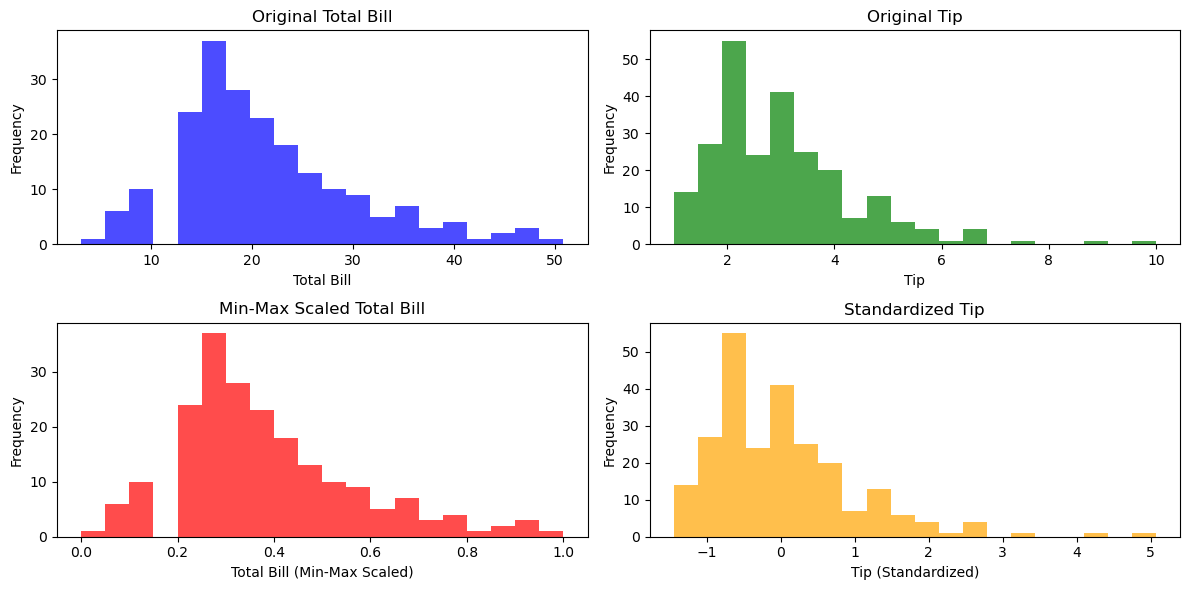

In [54]:

import matplotlib.pyplot as plt

# Plot histograms for original and scaled features
plt.figure(figsize=(12, 6))

# Original features
plt.subplot(2, 2, 1)
plt.hist(tips_df['total_bill'], bins=20, color='blue', alpha=0.7)
plt.title('Original Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(tips_df['tip'], bins=20, color='green', alpha=0.7)
plt.title('Original Tip')
plt.xlabel('Tip')
plt.ylabel('Frequency')

# Scaled features
plt.subplot(2, 2, 3)
plt.hist(tips_df['total_bill_minmax'], bins=20, color='red', alpha=0.7)
plt.title('Min-Max Scaled Total Bill')
plt.xlabel('Total Bill (Min-Max Scaled)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(tips_df['tip_standardized'], bins=20, color='orange', alpha=0.7)
plt.title('Standardized Tip')
plt.xlabel('Tip (Standardized)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 4.Create a new feature representing the average tip percentage for each dining party size.

In [43]:
import pandas as pd

# Read the dataset from CSV
tips_df = pd.read_csv("tips.csv")

# Calculate tip percentage
tips_df['tip_percentage'] = (tips_df['tip'] / tips_df['total_bill']) * 100

# Calculate average tip percentage for each party size
average_tip_percentage_by_party_size = tips_df.groupby('size')['tip_percentage'].mean().reset_index()
average_tip_percentage_by_party_size.rename(columns={'tip_percentage': 'avg_tip_percentage'}, inplace=True)

# Merge the average tip percentage back into the original dataframe
tips_df = pd.merge(tips_df, average_tip_percentage_by_party_size, on='size', how='left')

# Display the updated dataset
print("Updated tips dataset with average tip percentage by party size:")
print(tips_df.head())


Updated tips dataset with average tip percentage by party size:
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size  \
0           0       16.99  1.01  Female     No  Sun  Dinner     2   
1           1         NaN  1.66    Male     No  Sun  Dinner     3   
2           2       21.01  3.50    Male     No  Sun  Dinner     3   
3           3       23.68  3.31    Male     No  Sun  Dinner     2   
4           4       24.59  3.61  Female     No  Sun  Dinner     4   

   tip_percentage  avg_tip_percentage  
0        5.944673           16.587698  
1             NaN           15.165983  
2       16.658734           15.165983  
3       13.978041           16.587698  
4       14.680765           14.594901  


### 5.Create a new feature based on total bill and tips if total bill is greater than 10$

### and tips is greaterthan 3$ mark as Highest-bills-with-tips otherwise Normal-bills

In [45]:
import pandas as pd

# Read the dataset from CSV
tips_df = pd.read_csv("tips.csv")

# Create a new feature based on total bill and tips
tips_df['bill_type'] = 'Normal-bills'
tips_df.loc[(tips_df['total_bill'] > 10) & (tips_df['tip'] > 3), 'bill_type'] = 'Highest-bills-with-tips'

# Display the updated dataset
print("Updated tips dataset with bill type:")
print(tips_df.head())


Updated tips dataset with bill type:
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size  \
0           0       16.99  1.01  Female     No  Sun  Dinner     2   
1           1         NaN  1.66    Male     No  Sun  Dinner     3   
2           2       21.01  3.50    Male     No  Sun  Dinner     3   
3           3       23.68  3.31    Male     No  Sun  Dinner     2   
4           4       24.59  3.61  Female     No  Sun  Dinner     4   

                 bill_type  
0             Normal-bills  
1             Normal-bills  
2  Highest-bills-with-tips  
3  Highest-bills-with-tips  
4  Highest-bills-with-tips  
